<a href="https://colab.research.google.com/github/BenyaminMalikov/PythonDataScience/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-08-15 09:41:03--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-15 09:41:03 (105 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, plot_loss_curves

In [ ]:
unzip_data('/content/fruits.zip')

# Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     rescale=1/255.)
val_generator = ImageDataGenerator(width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     rescale=1/255.)

train_dir = '/content/fruits-360_dataset_original-size/fruits-360-original-size/Training'
val_dir = '/content/fruits-360_dataset_original-size/fruits-360-original-size/Validation'

train_datagen = train_generator.flow_from_directory(directory = train_dir,
                                                    target_size=(128, 128),
                                                    class_mode='categorical',
                                                    batch_size=32)
val_datagen = val_generator.flow_from_directory(directory = val_dir,
                                                target_size=(128, 128),
                                                class_mode='categorical',
                                                batch_size=32)

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

# Baseline Model

In [ ]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',padding='same'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',padding='same'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(24, activation='softmax')

])


In [ ]:
baseline_model.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                       metrics=["accuracy"])

In [ ]:
baseline_model_history = baseline_model.fit(train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 324ms/step - accuracy: 0.3171 - loss: 3.7844 - val_accuracy: 0.8285 - val_loss: 0.5345
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 56s 282ms/step - accuracy: 0.8730 - loss: 0.3586 - val_accuracy: 0.8921 - val_loss: 0.3327
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 59s 292ms/step - accuracy: 0.9320 - loss: 0.2066 - val_accuracy: 0.9583 - val_loss: 0.1267
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 55s 279ms/step - accuracy: 0.9625 - loss: 0.1134 - val_accuracy: 0.9647 - val_loss: 0.1170
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 59s 297ms/step - accuracy: 0.9635 - loss: 0.0956 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step - accuracy: 0.9794 - loss: 0.0665 - val_accuracy: 0.9878 - val_loss: 0.0399
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9744 - loss: 0.0802 - val_accuracy: 0.9631 - val_loss: 0.1197
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 297ms/step - accuracy: 0.9813 - loss: 0.0649 - val

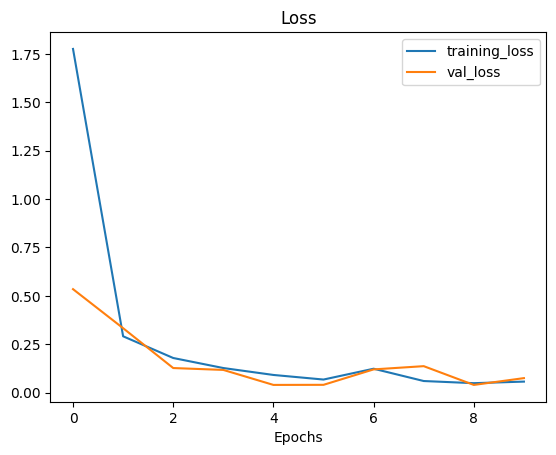

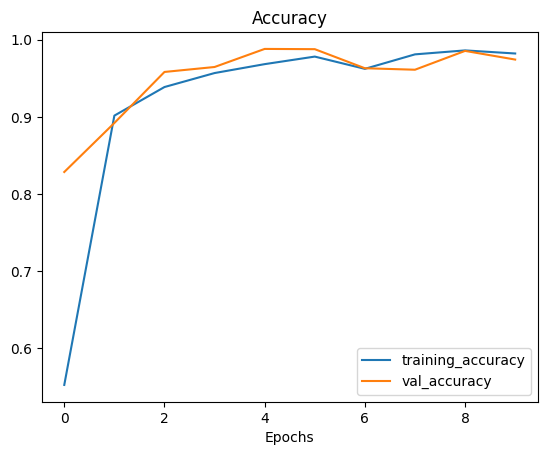

In [ ]:
plot_loss_curves(baseline_model_history)

# VGG16

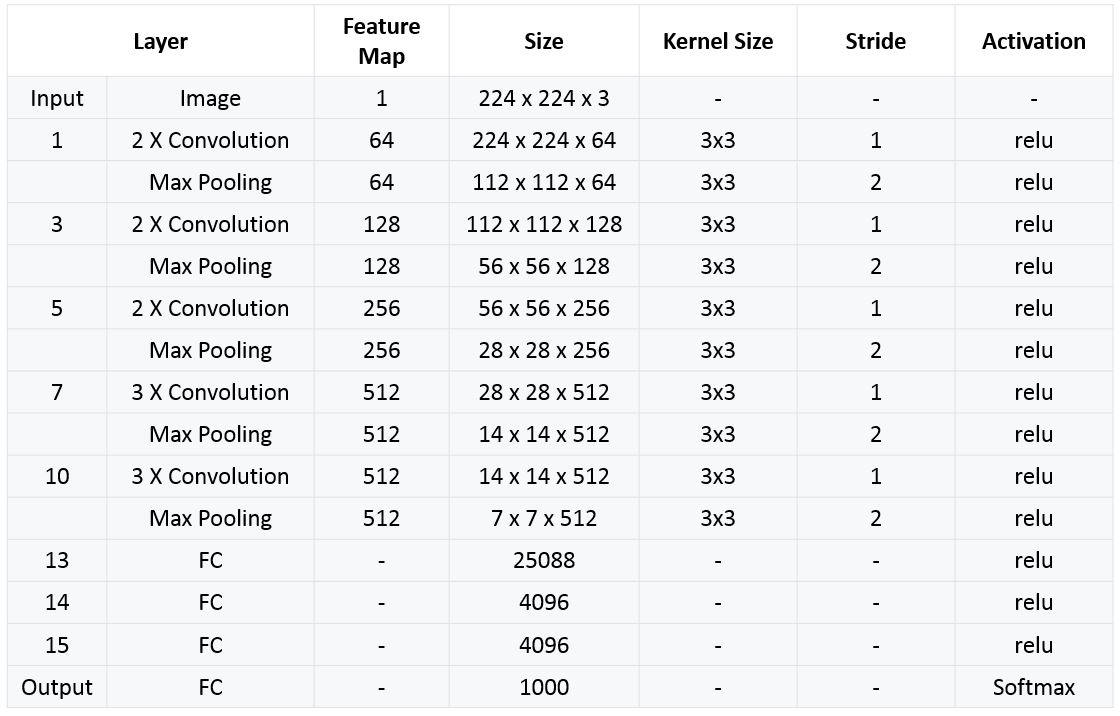

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

vgg16_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(2,strides=2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(2,strides=2),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(2,strides=2),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(2,strides=2),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(2,strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(4096, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(24, activation="softmax")
])

In [ ]:
vgg16_model.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                    metrics=["accuracy"])


In [ ]:
vgg16_history = vgg16_model.fit(train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 445ms/step - accuracy: 0.0621 - loss: 4.1749 - val_accuracy: 0.2778 - val_loss: 1.9753
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 326ms/step - accuracy: 0.3841 - loss: 1.6324 - val_accuracy: 0.7588 - val_loss: 0.6209
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.7609 - loss: 0.6305 - val_accuracy: 0.8558 - val_loss: 0.3992
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 66s 335ms/step - accuracy: 0.8691 - loss: 0.3528 - val_accuracy: 0.9184 - val_loss: 0.2446
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 324ms/step - accuracy: 0.9116 - loss: 0.2589 - val_accuracy: 0.9053 - val_loss: 0.2488
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 327ms/step - accuracy: 0.9208 - loss: 0.2119 - val_accuracy: 0.9631 - val_loss: 0.1035
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 68s 342ms/step - accuracy: 0.9577 - loss: 0.1232 - val_accuracy: 0.9406 - val_loss: 0.2064
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 66s 335ms/step - accuracy: 0.9186 - loss: 

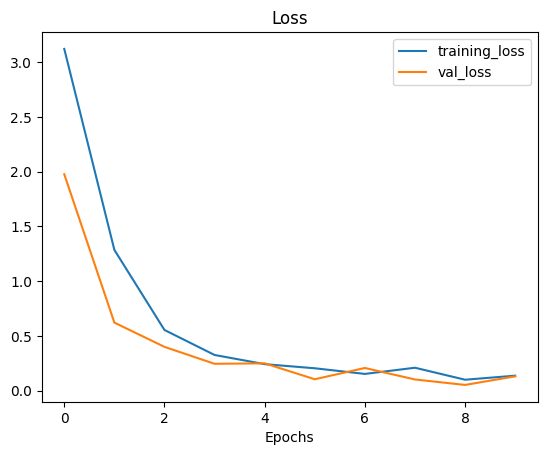

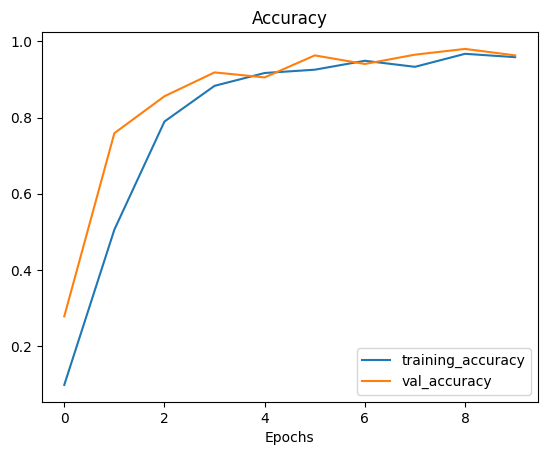

In [ ]:
plot_loss_curves(vgg16_history)

# GoogleNet (Inception Model)

In [ ]:
import tensorflow as tf

def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = tf.keras.layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)

    # 3x3 convolution
    conv3x3 = tf.keras.layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    conv3x3 = tf.keras.layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv3x3)

    # 5x5 convolution
    conv5x5 = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    conv5x5 = tf.keras.layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu', kernel_initializer='he_normal')(conv5x5)

    # Max pooling
    maxpool = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = tf.keras.layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(maxpool)

    # Concatenate filters
    concat = tf.keras.layers.Concatenate(axis=-1)([conv1x1, conv3x3, conv5x5, maxpool])
    return concat

input_layer = tf.keras.layers.Input(shape=(128, 128, 3))

# Initial layers
x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(input_layer)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Conv2D(192, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Inception modules
x = inception_module(x, [64, 96, 128, 16, 32, 32])
x = inception_module(x, [128, 128, 192, 32, 96, 64])
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [192, 96, 208, 16, 48, 64])
x = inception_module(x, [160, 112, 224, 24, 64, 64])
x = inception_module(x, [128, 128, 256, 24, 64, 64])
x = inception_module(x, [112, 144, 288, 32, 64, 64])
x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = inception_module(x, [384, 192, 384, 48, 128, 128])

# Final layers
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(24, activation='softmax')(x)

# Create inception_model
inception_model = tf.keras.Model(input_layer, x)

# Compile inception_model
inception_model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                metrics=['accuracy'])

# Print inception_model summary
inception_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_126 (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 32, 32, 64)     │              0 │ conv2d_126[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ max_pooling2d_31[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_127 (Conv2D)       │ (None, 32, 32, 64)     │          4,160 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_128 (Conv2D)       │ (None, 32, 32, 192)    │        110,784 │ conv2d_127[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 192)    │            768 │ conv2d_128[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_32          │ (None, 16, 16, 192)    │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_130 (Conv2D)       │ (None, 16, 16, 96)     │         18,528 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_132 (Conv2D)       │ (None, 16, 16, 16)     │          3,088 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_33          │ (None, 16, 16, 192)    │              0 │ max_pooling2d_32[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_129 (Conv2D)       │ (None, 16, 16, 64)     │         12,352 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_131 (Conv2D)       │ (None, 16, 16, 128)    │        110,720 │ conv2d_130[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_133 (Conv2D)       │ (None, 16, 16, 32)     │         12,832 │ conv2d_132[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_134 (Conv2D)       │ (None, 16, 16, 32)     │          6,176 │ max_pooling2d_33[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 16, 16, 256)    │              0 │ conv2d_129[0][0],      │
│ (Concatenate)             │                        │                │ conv2d_131[0][0],      │
│                      

 Total params: 6,367,816 (24.29 MB)

 Trainable params: 6,367,304 (24.29 MB)

 Non-trainable params: 512 (2.00 KB)

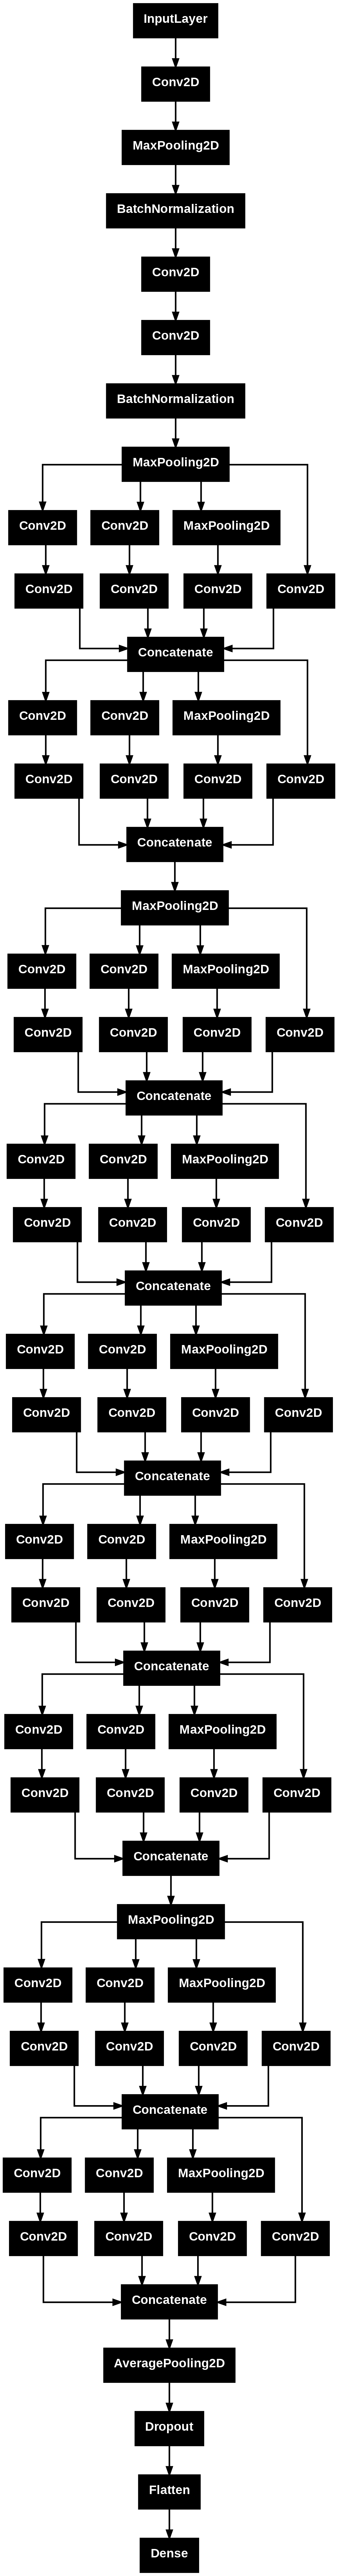

In [ ]:
tf.keras.utils.plot_model(inception_model)

In [ ]:
!pip install visualkeras
import visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 19.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


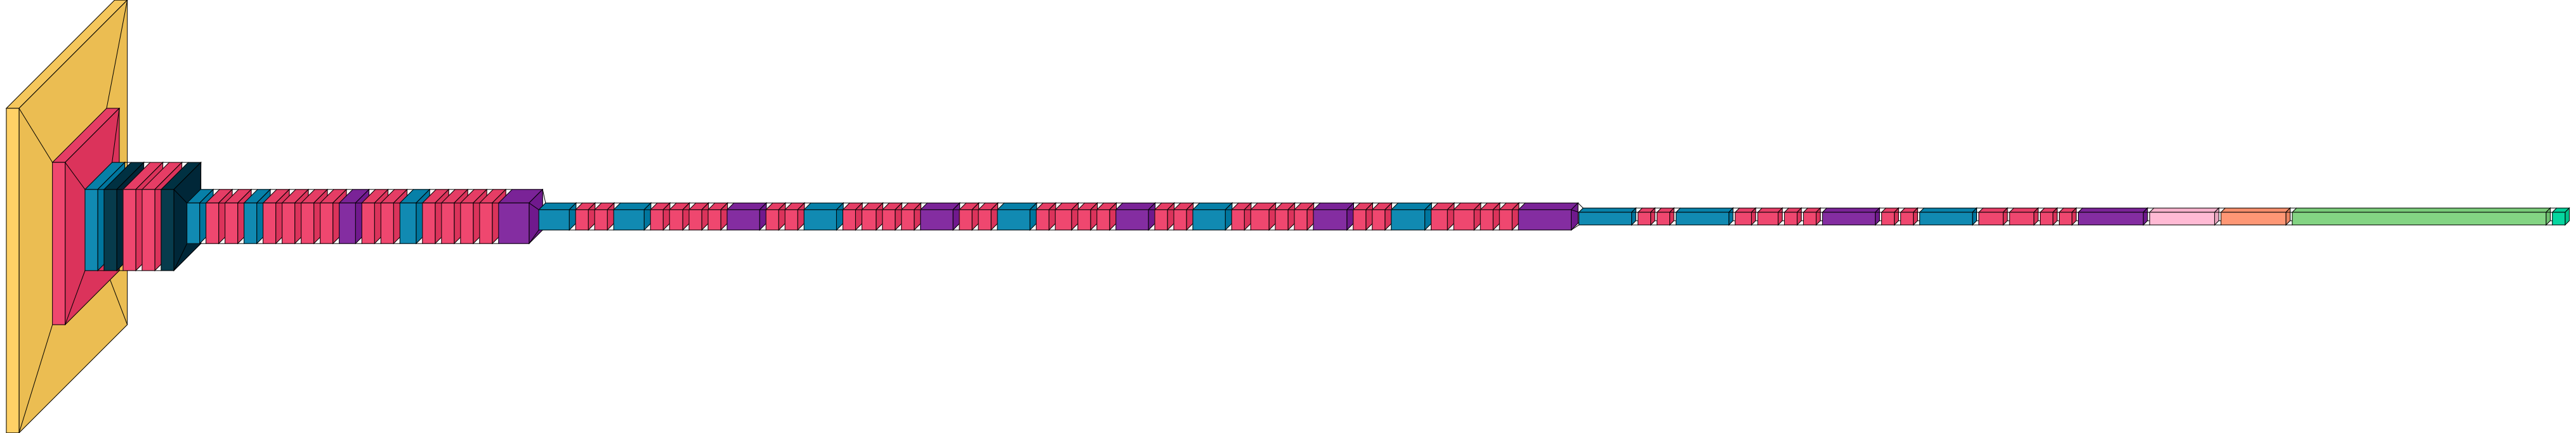

In [ ]:
visualkeras.layered_view(inception_model)

In [ ]:
inception_model_history = inception_model.fit(train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 523ms/step - accuracy: 0.2727 - loss: 2.9946 - val_accuracy: 0.4872 - val_loss: 1.3789
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 286ms/step - accuracy: 0.8495 - loss: 0.4204 - val_accuracy: 0.8414 - val_loss: 0.4369
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 293ms/step - accuracy: 0.9262 - loss: 0.2260 - val_accuracy: 0.9188 - val_loss: 0.2310
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 288ms/step - accuracy: 0.9325 - loss: 0.2105 - val_accuracy: 0.9682 - val_loss: 0.1009
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 305ms/step - accuracy: 0.9710 - loss: 0.1052 - val_accuracy: 0.9560 - val_loss: 0.1245
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 289ms/step - accuracy: 0.9683 - loss: 0.0968 - val_accuracy: 0.9351 - val_loss: 0.2056
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 286ms/step - accuracy: 0.9632 - loss: 0.1053 - val_accuracy: 0.9326 - val_loss: 0.2517
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 285ms/step - accuracy: 0.9806 - loss: 

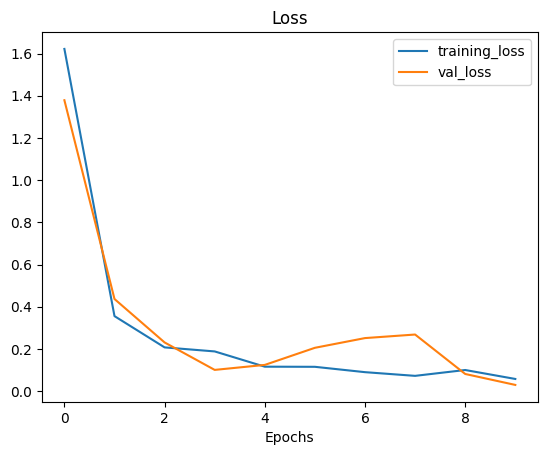

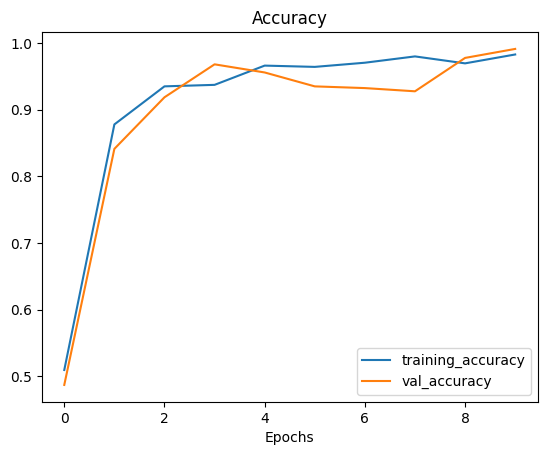

In [ ]:
plot_loss_curves(inception_model_history)

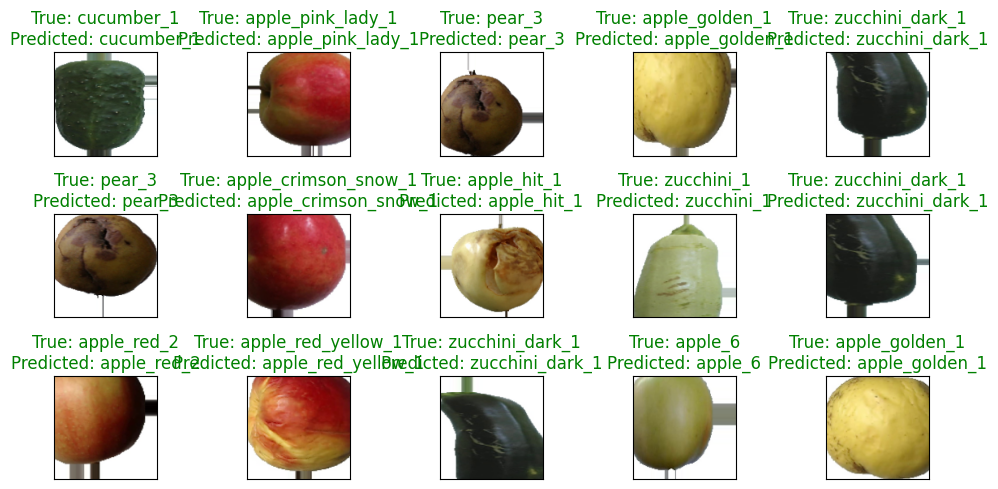

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Emotion classes for the dataset
fruit_classes = ['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_violet_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

# Assuming val_datagen and inception_model are already defined
#Val_datagen və başlanğıc_modelinin artıq müəyyən edildiyini fərz etsək
batch_size = val_datagen.batch_size

# Selecting a random batch from the val_datagen

Random_batch = np.random.randint(0, len(val_datagen) - 1)


Random_Img_Index = np.random.randint(0, batch_size,15)

# Setting up the plot
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = val_datagen[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(val_datagen[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the inception_model
    inception_model_Prediction = np.argmax(inception_model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if fruit_classes[Random_Img_Label] == fruit_classes[inception_model_Prediction] else "red"
    ax.set_title(f"True: {fruit_classes[Random_Img_Label]}\nPredicted: {fruit_classes[inception_model_Prediction]}", color=color)

plt.tight_layout()
plt.show()

# Object Detection

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO

In [ ]:
!kaggle datasets download -d lakshaytyagi01/fruit-detection

Dataset URL: https://www.kaggle.com/datasets/lakshaytyagi01/fruit-detection
License(s): CC0-1.0
 99% 497M/501M [00:10<00:00, 21.1MB/s]
100% 501M/501M [00:10<00:00, 49.6MB/s]


In [ ]:
unzip_data('/content/fruit-detection.zip')

In [ ]:
!yolo mode=train model=yolov8n.pt data='/content/Fruits-detection/data.yaml' epochs=25 imgsz=128 plots=True


100% 6.25M/6.25M [00:00<00:00, 117MB/s]
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Fruits-detection/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

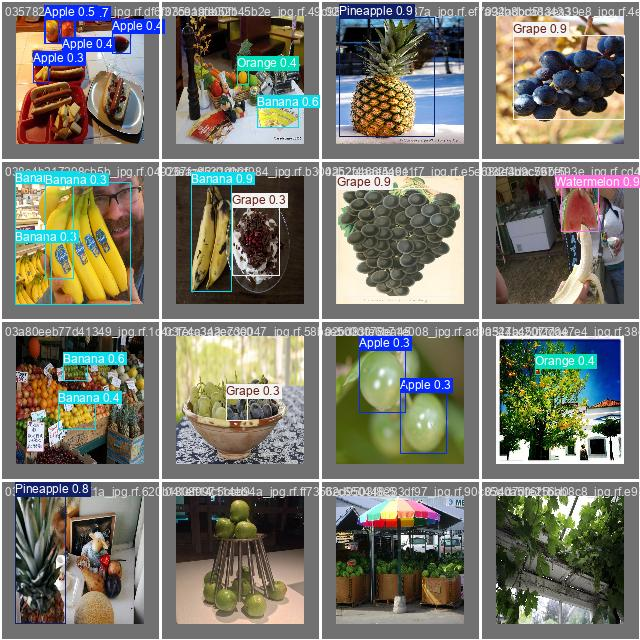

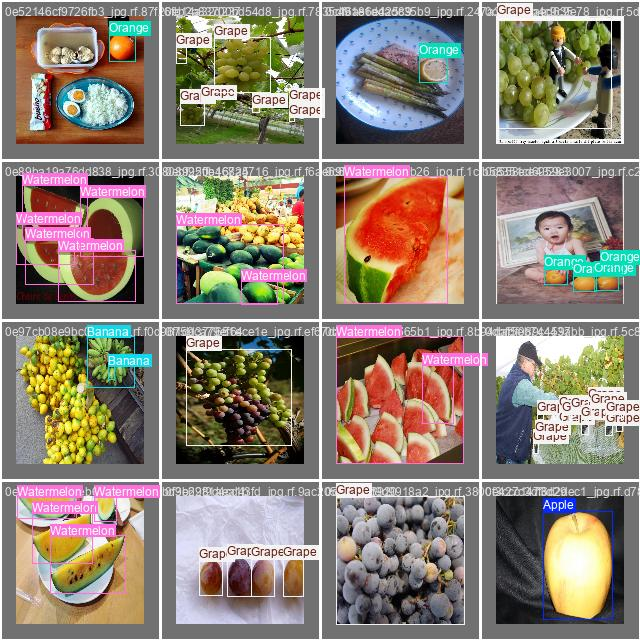